In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Forward model to generate some synthetic data

In [130]:
from advectionGP.wind import Wind

class WindFromData(Wind):
    def __init__(self):
        """
        Provides wind from an external dataset.
        """

    def getwind(self,coords):
        """
        Returns the wind at given times and places, pass it [something]x3 array [time,x,y].
        """

        return 0.1*np.transpose(np.array([-coords[...,2], coords[...,1]]),[1,2,0])
        
        #return np.repeat(np.array([self.speedx,self.speedy])[None,:],len(coords),0)
        #if self.speedz is None:
        #    return np.repeat(np.array([self.speedx,self.speedy])[None,:],np.prod(coords.shape[:-1]),axis=0).reshape(coords.shape)
        #else:
        #    return np.repeat(np.array([self.speedx,self.speedy,self.speedz])[None,:],np.prod(coords.shape[:-1]),axis=0).reshape(coords.shape)


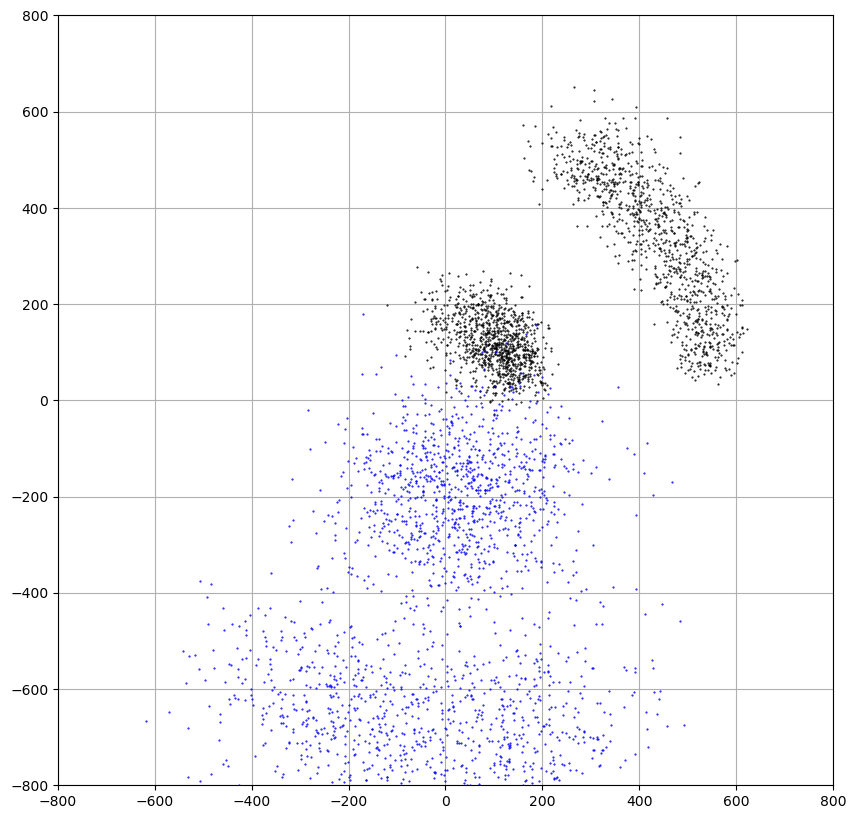

In [151]:
Npart = 1000
Nsources = 2
particles = np.random.rand(Npart,Nsources,3)*np.array([10,100,100])
translation = np.zeros([Nsources,3])
translation[0,1]=500
translation[1,1]=100
#translation[2,1]=300
#translation[3,1]=500
particles+=translation

windmodel = WindFromData()
wind = windmodel.getwind(particles)

plt.figure(figsize=[10,10])
tstep = 1
k_0 = 100
for t in np.arange(0,100,tstep):
    wind = windmodel.getwind(particles)
    particles[:,:,1:]+=wind*tstep
    particles[:,:,1:]+=np.random.randn(*particles.shape[:-1],particles.shape[-1]-1)*np.sqrt(2*tstep*k_0)
    particles[:,:,0:1]+=tstep
    
    particlesnow = particles[(particles[:,:,0]>50) & (particles[:,:,0]<51),:]
    plt.plot(particlesnow[:,1],particlesnow[:,2],'.b',markersize=1)

    particlesnow = particles[(particles[:,:,0]>10) & (particles[:,:,0]<11),:]
    plt.plot(particlesnow[:,1],particlesnow[:,2],'.k',markersize=1)
plt.xlim([-800,800])
plt.ylim([-800,800])
plt.grid()
    #print(np.mean(particles[:,:,0]))

In [125]:
particles[(particles[:,:,0]>50) & (particles[:,:,0]<60),:].shape

(0, 3)

In [126]:
particles[((particles[:,:,0]>50) & (particles[:,:,0]<60))].shape

(0, 3)

In [117]:
particles.shape

(100, 2, 3)